In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import glob
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
os.chdir("/content/drive/MyDrive/Learning/CSV")
!ls

earthquake_data.csv  gratkapl.csv  ML_datasets


In [4]:
import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Learning/CSV'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/Learning/CSV/gratkapl.csv
/content/drive/MyDrive/Learning/CSV/earthquake_data.csv
/content/drive/MyDrive/Learning/CSV/ML_datasets/diabetes.csv
/content/drive/MyDrive/Learning/CSV/ML_datasets/glass.csv
/content/drive/MyDrive/Learning/CSV/ML_datasets/iris.csv
/content/drive/MyDrive/Learning/CSV/ML_datasets/wine.csv


In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
df=pd.read_csv('earthquake_data.csv')

In [8]:
df.head()

,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country
0,"M 7.0 - 18 km SW of Malango, Solomon Islands",7.0,22-11-2022 02:03,8,7,green,1,768,us,117,0.509,17.0,mww,14.000,-9.7963,159.596,"Malango, Solomon Islands",Oceania,Solomon Islands
1,"M 6.9 - 204 km SW of Bengkulu, Indonesia",6.9,18-11-2022 13:37,4,4,green,0,735,us,99,2.229,34.0,mww,25.000,-4.9559,100.738,"Bengkulu, Indonesia",NaN,NaN
2,M 7.0 -,7.0,12-11-2022 07:09,3,3,green,1,755,us,147,3.125,18.0,mww,579.000,-20.0508,-178.346,NaN,Oceania,Fiji
3,"M 7.3 - 205 km ESE of Neiafu, Tonga",7.3,11-11-2022 10:48,5,5,green,1,833,us,149,1.865,21.0,mww,37.000,-19.2918,-172.129,"Neiafu, Tonga",NaN,NaN
4,M 6.6 -,6.6,09-11-2022 10:14,0,2,green,1,670,us,131,4.998,27.0,mww,624.464,-25.5948,178.278,NaN,NaN,NaN


In [13]:
Magnitude_Type = df['magType'].unique()
Magnitude_Type

array(['mww', 'mwb', 'Mi', 'ml', 'mw', 'mwc', 'ms', 'mb', 'md'],
      dtype=object)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      782 non-null    object 
 1   magnitude  782 non-null    float64
 2   date_time  782 non-null    object 
 3   cdi        782 non-null    int64  
 4   mmi        782 non-null    int64  
 5   alert      415 non-null    object 
 6   tsunami    782 non-null    int64  
 7   sig        782 non-null    int64  
 8   net        782 non-null    object 
 9   nst        782 non-null    int64  
 10  dmin       782 non-null    float64
 11  gap        782 non-null    float64
 12  magType    782 non-null    object 
 13  depth      782 non-null    float64
 14  latitude   782 non-null    float64
 15  longitude  782 non-null    float64
 16  location   777 non-null    object 
 17  continent  206 non-null    object 
 18  country    484 non-null    object 
dtypes: float64(6), int64(5), object(8)
memory usage: 1

In [15]:
df.describe()

,magnitude,cdi,mmi,tsunami,sig,nst,dmin,gap,depth,latitude,longitude
count,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000
mean,6.941125,4.333760,5.964194,0.388747,870.108696,230.250639,1.325757,25.038990,75.883199,3.538100,52.609199
std,0.445514,3.169939,1.462724,0.487778,322.465367,250.188177,2.218805,24.225067,137.277078,27.303429,117.898886
min,6.500000,0.000000,1.000000,0.000000,650.000000,0.000000,0.000000,0.000000,2.700000,-61.848400,-179.968000
25%,6.600000,0.000000,5.000000,0.000000,691.000000,0.000000,0.000000,14.625000,14.000000,-14.595600,-71.668050
50%,6.800000,5.000000,6.000000,0.000000,754.000000,140.000000,0.000000,20.000000,26.295000,-2.572500,109.426000
75%,7.100000,7.000000,7.000000,1.000000,909.750000,445.000000,1.863000,30.000000,49.750000,24.654500,148.941000
max,9.100000,9.000000,9.000000,1.000000,2910.000000,934.000000,17.654000,239.000000,670.810000,71.631200,179.662000


Calculation of percentage null data

In [18]:
df.isnull().sum()/df.shape[0]*100

title         0.000000
magnitude     0.000000
date_time     0.000000
cdi           0.000000
mmi           0.000000
alert        46.930946
tsunami       0.000000
sig           0.000000
net           0.000000
nst           0.000000
dmin          0.000000
gap           0.000000
magType       0.000000
depth         0.000000
latitude      0.000000
longitude     0.000000
location      0.639386
continent    73.657289
country      38.107417
dtype: float64

In [19]:
df.columns

Index(['title', 'magnitude', 'date_time', 'cdi', 'mmi', 'alert', 'tsunami',
       'sig', 'net', 'nst', 'dmin', 'gap', 'magType', 'depth', 'latitude',
       'longitude', 'location', 'continent', 'country'],
      dtype='object')

DROPING UNNECESSARY DATA

In [20]:
df.drop(['title', 'continent', 'alert','location'],axis=1,inplace=True)

In [22]:
df.head(2)

,magnitude,date_time,cdi,mmi,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,country
0,7.0,22-11-2022 02:03,8,7,1,768,us,117,0.509,17.0,mww,14.0,-9.7963,159.596,Solomon Islands
1,6.9,18-11-2022 13:37,4,4,0,735,us,99,2.229,34.0,mww,25.0,-4.9559,100.738,NaN


In [23]:
df['date_time']=pd.to_datetime(df['date_time'])
df['Year']=pd.DatetimeIndex(df["date_time"]).year
df['Month']=pd.DatetimeIndex(df["date_time"]).month
df.drop('date_time',axis=1,inplace=True)

In [24]:
df.head(2)

,magnitude,cdi,mmi,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,country,Year,Month
0,7.0,8,7,1,768,us,117,0.509,17.0,mww,14.0,-9.7963,159.596,Solomon Islands,2022,11
1,6.9,4,4,0,735,us,99,2.229,34.0,mww,25.0,-4.9559,100.738,NaN,2022,11


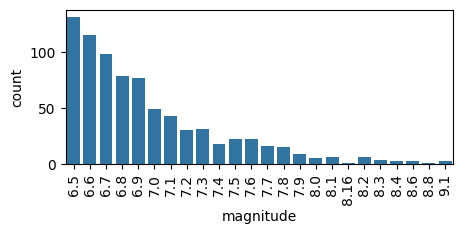

In [28]:

plt.figure(figsize=(5,2))
sns.countplot(x='magnitude',data=df)
plt.xticks(rotation=90) # Rotate x-axis labels for better readability
plt.tick_params(axis='both', which='major', labelsize=10) # Change tick label size
plt.show()


In [41]:
o=df['country'].value_counts().head(15).index

In [43]:
o

Index(['Indonesia', 'Papua New Guinea', 'Chile', 'Vanuatu', 'Solomon Islands',
       'Japan', 'Mexico', 'Peru', 'Philippines', 'United States of America',
       'Russia', 'People's Republic of China', 'Fiji', 'New Zealand',
       'Afghanistan'],
      dtype='object', name='country')

In [42]:
b = df['country'].value_counts().reset_index()
b.head(2)

,country,count
0,Indonesia,110
1,Papua New Guinea,56


Text(0.5, 1.0, 'TOP 15 EARTHQUAKE PRONE COUNTRIES')

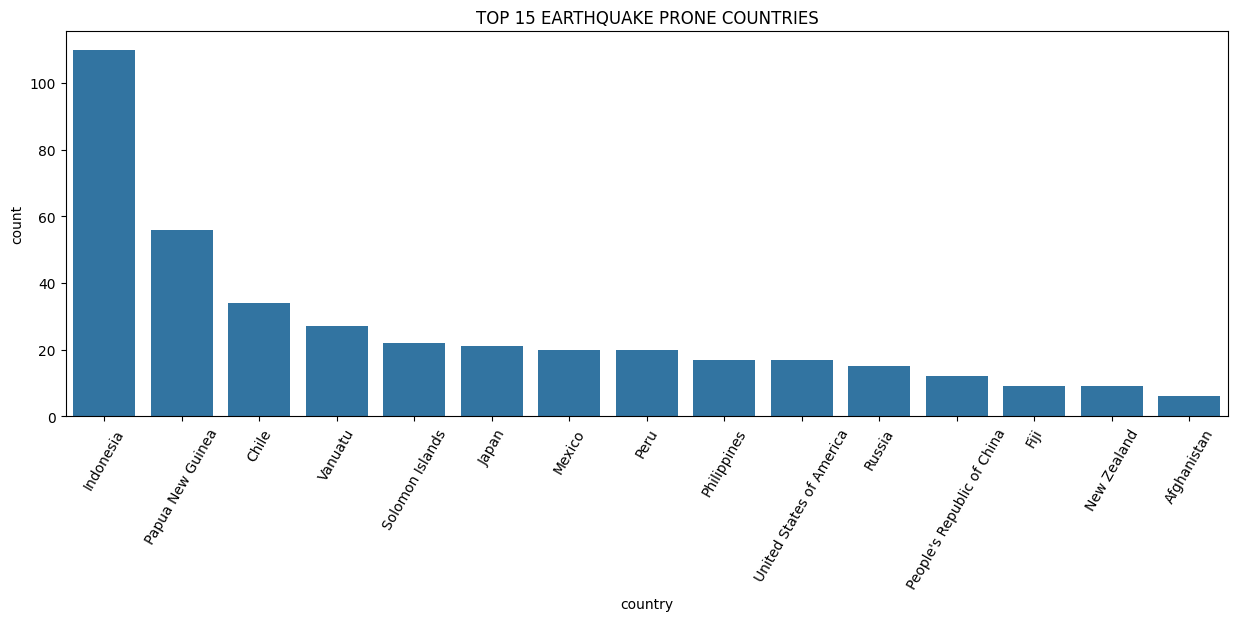

In [44]:
plt.figure(figsize=(15,5))
sns.countplot(x='country',data=df,order=o)
plt.xticks(rotation=60)
plt.title('TOP 15 EARTHQUAKE PRONE COUNTRIES')
#Indonesia has the highest number of earthquakes.

In [45]:
o=df['country'].value_counts().head(10).index

Text(0.5, 1.0, 'TSUNAMI CHANCE IN TOP 10 EARTHQUAKE PRONE COUNTRIES')

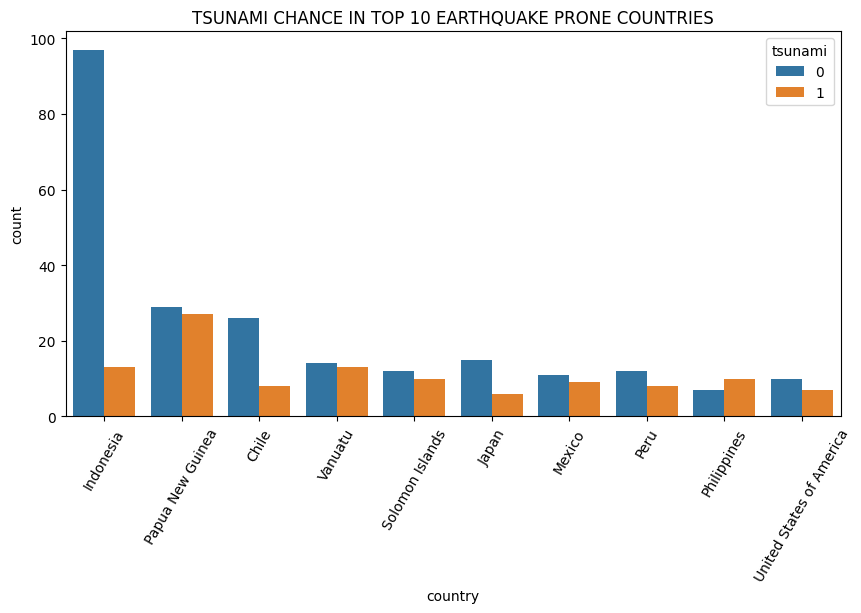

In [47]:
plt.figure(figsize=(10,5))
sns.countplot(x='country',data=df,order=o,hue='tsunami')
plt.xticks(rotation=60)
plt.title('TSUNAMI CHANCE IN TOP 10 EARTHQUAKE PRONE COUNTRIES')
#Indonesia has the highest number of earthquakes worldwide, but Papua New Guinea and Philippines  has a very high risk of tsunamis following an earthquake.

Text(0.5, 1.0, 'TSUNAMI CHANCE IN TOP 10 EARTHQUAKE PRONE COUNTRIES')

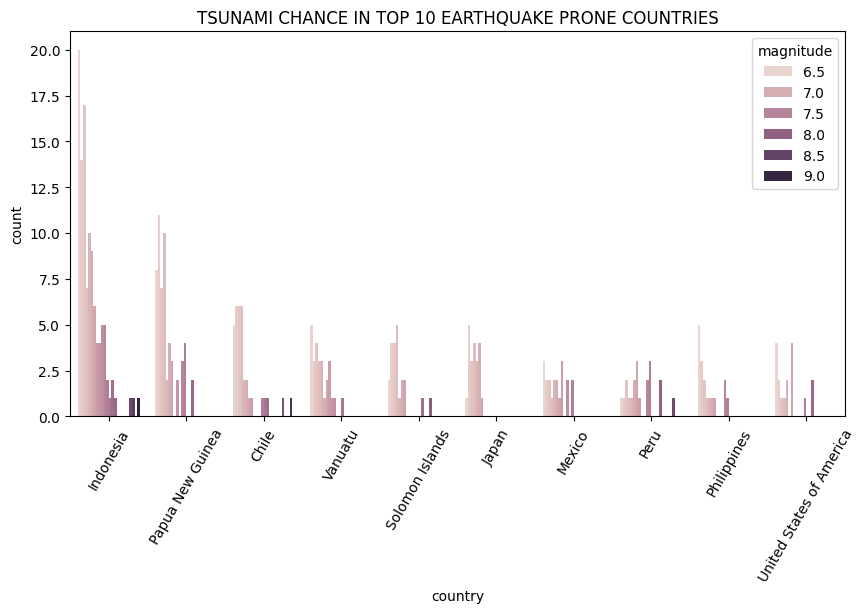

In [48]:
plt.figure(figsize=(10,5))
sns.countplot(x='country',data=df,order=o,hue='magnitude')
plt.xticks(rotation=60)
plt.title('TSUNAMI CHANCE IN TOP 10 EARTHQUAKE PRONE COUNTRIES')
#Indonesia has the highest number of earthquakes worldwide, and the highest magnitude. Peru nad Chile also have high magnitude.

<Axes: xlabel='sig', ylabel='magnitude'>

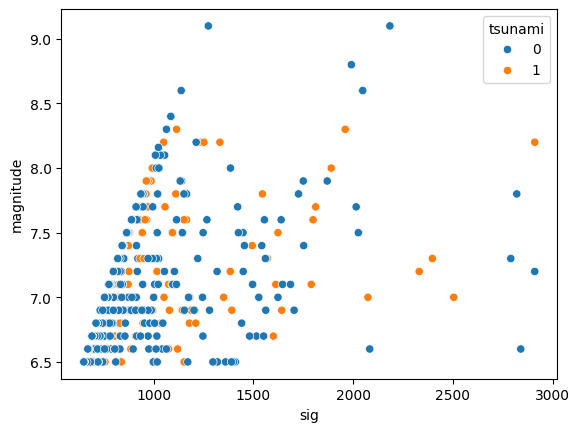

In [56]:
sns.scatterplot(x='sig',y='magnitude',data=df,hue='tsunami')
#the higher the magnitude higher the chance of tsunami

Text(0.5, 1.0, 'EARTHQUICK DATA CONTRIBUTOR')

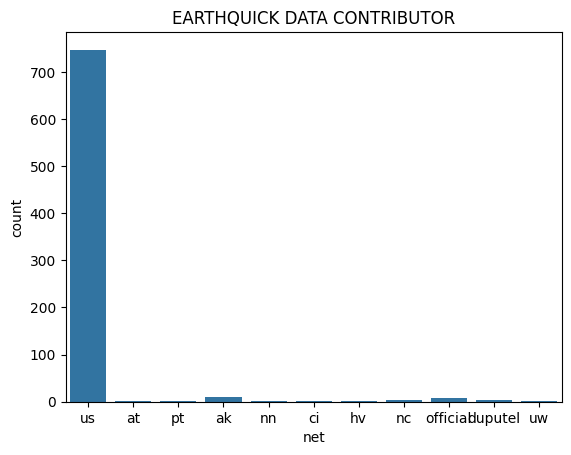

In [57]:
sns.countplot(x='net',data=df)
plt.title('EARTHQUICK DATA CONTRIBUTOR')
#The US is a major contributor of earthquake data

Text(0.5, 1.0, 'Tsunami Distribution')

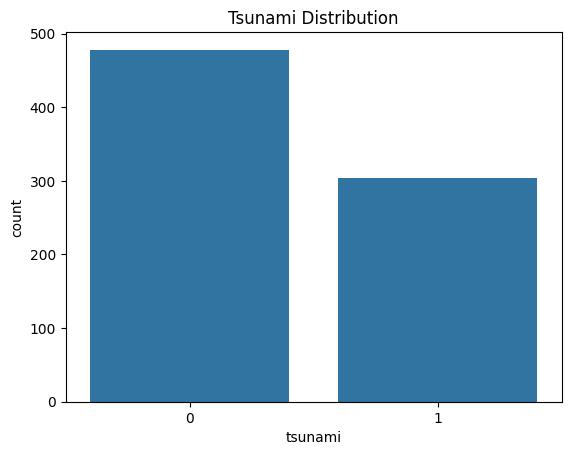

In [58]:
sns.countplot(x='tsunami',data=df)
plt.title('Tsunami Distribution')

<Axes: xlabel='Year', ylabel='count'>

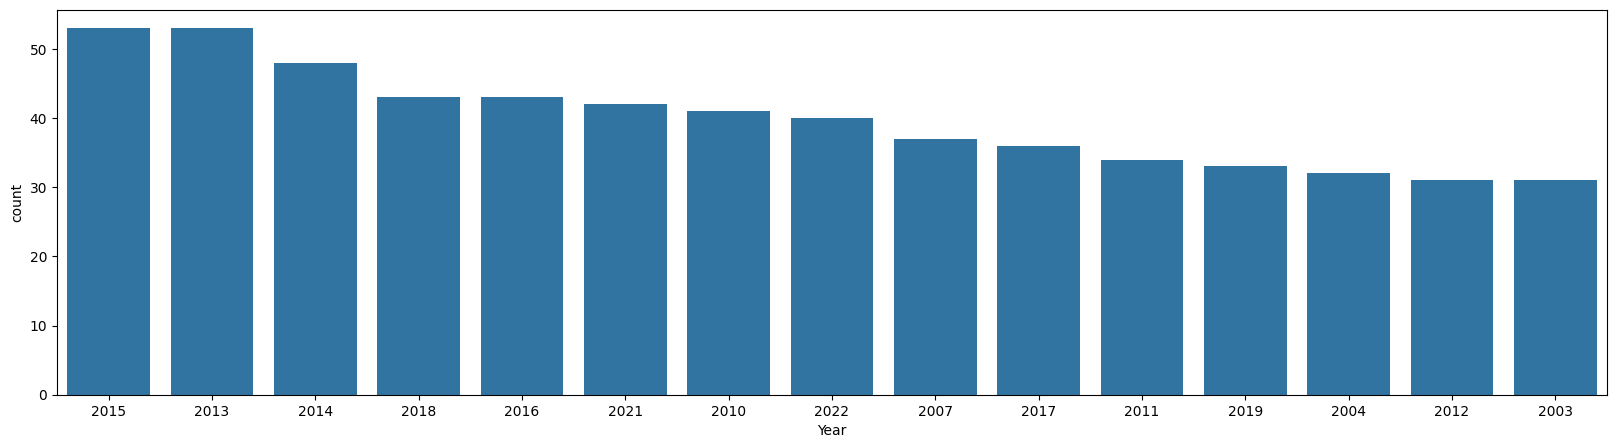

In [59]:
plt.figure(figsize=(20,5))
o=df['Year'].value_counts().head(15).index
sns.countplot(x='Year',data=df,order=o)
#In 2015 and 2013, the world experienced the highest number of earthquakes.

Text(0.5, 1.0, 'NUMBER OF EARTHQUAKES ENCOUNTERED IN PAPUA NEW GUINEA PER YEAR')

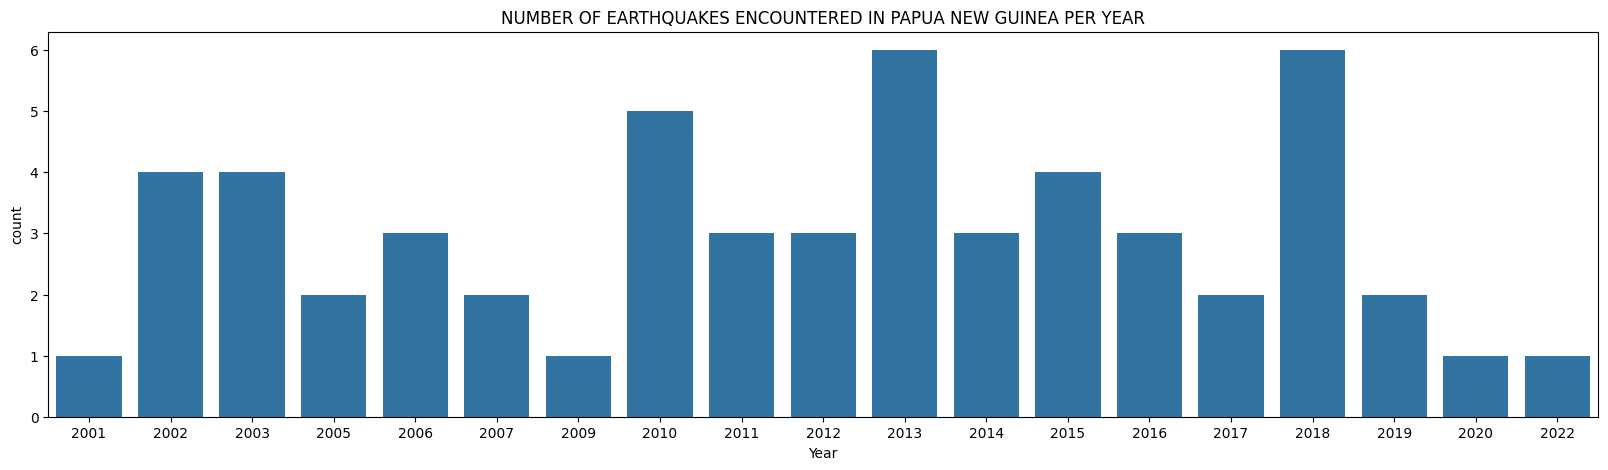

In [60]:
Papua=df[df['country']=='Papua New Guinea']
plt.figure(figsize=(20,5))
sns.countplot(x='Year',data=Papua)
plt.title('NUMBER OF EARTHQUAKES ENCOUNTERED IN PAPUA NEW GUINEA PER YEAR')

Text(0.5, 1.0, 'NUMBER OF EARTHQUAKES ENCOUNTERED IN INDONESIA PER YEAR')

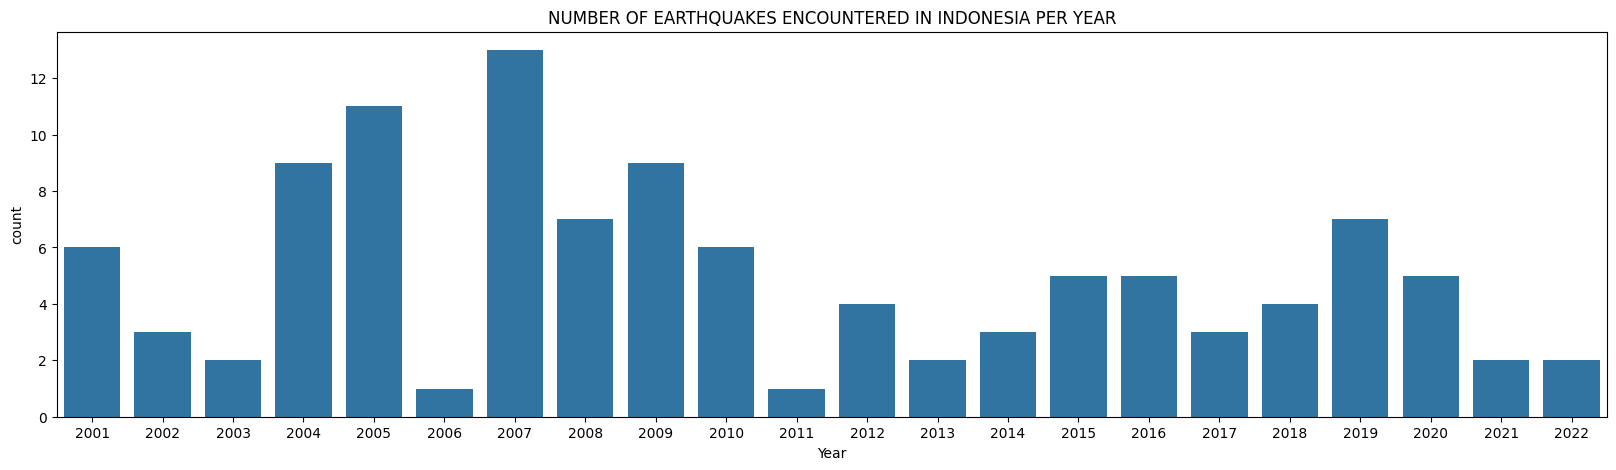

In [61]:
Indo=df[df['country']=='Indonesia']
plt.figure(figsize=(20,5))
sns.countplot(x='Year',data=Indo)
plt.title('NUMBER OF EARTHQUAKES ENCOUNTERED IN INDONESIA PER YEAR')
#Indonesia encountered 13 earthquic in the year 2007

Text(0.5, 1.0, 'NUMBER OF EARTHQUAKES ENCOUNTERED IN PHILIPPINES PER YEAR')

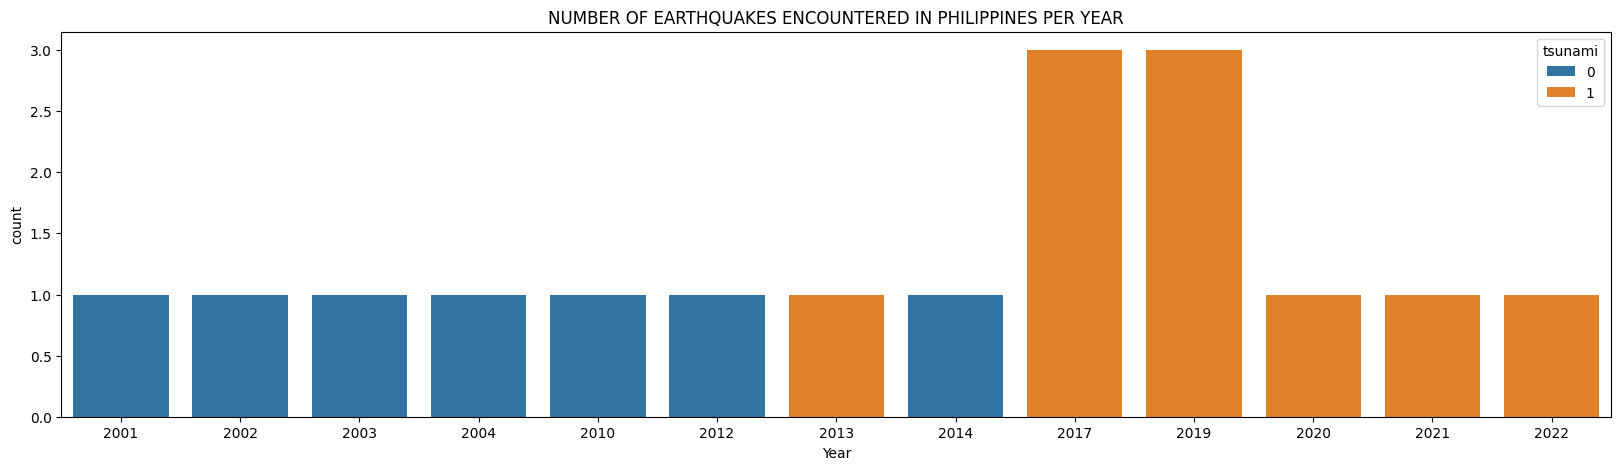

In [62]:
Phi=df[df['country']=='Philippines']
plt.figure(figsize=(20,5))
sns.countplot(x='Year',data=Phi,hue='tsunami')
plt.title('NUMBER OF EARTHQUAKES ENCOUNTERED IN PHILIPPINES PER YEAR')

FEATURE ENGINEERING

In [63]:
df.drop('country',axis=1,inplace=True)

In [64]:
obj=df.select_dtypes(include=['object'])
obj

,net,magType
0,us,mww
1,us,mww
2,us,mww
3,us,mww
4,us,mww
...,...,...
777,us,mwc
778,ak,mw
779,us,mwb
780,us,mwc


In [66]:
obj.drop('net',axis=1,inplace=True)
df.drop(['net','magType'],axis=1,inplace=True)

In [67]:
obj.nunique()

magType    9
dtype: int64

In [69]:
Magnitude_Type1 = obj['magType'].unique()
Magnitude_Type1

array(['mww', 'mwb', 'Mi', 'ml', 'mw', 'mwc', 'ms', 'mb', 'md'],
      dtype=object)

In [68]:
obj

,magType
0,mww
1,mww
2,mww
3,mww
4,mww
...,...
777,mwc
778,mw
779,mwb
780,mwc


In [72]:
from sklearn.preprocessing import LabelEncoder
lr=LabelEncoder()

In [73]:
obj_lbl=obj.apply(lr.fit_transform)

In [77]:
df=pd.concat([df,obj_lbl],axis=1)
df.head()

,magnitude,cdi,mmi,tsunami,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,magType
0,7.0,8,7,1,768,117,0.509,17.0,14.000,-9.7963,159.596,2022,11,8
1,6.9,4,4,0,735,99,2.229,34.0,25.000,-4.9559,100.738,2022,11,8
2,7.0,3,3,1,755,147,3.125,18.0,579.000,-20.0508,-178.346,2022,11,8
3,7.3,5,5,1,833,149,1.865,21.0,37.000,-19.2918,-172.129,2022,11,8
4,6.6,0,2,1,670,131,4.998,27.0,624.464,-25.5948,178.278,2022,11,8


In [78]:
d=df.corr()

In [79]:
d

,magnitude,cdi,mmi,tsunami,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,magType
magnitude,1.000000,0.209549,0.285552,-0.004726,0.515871,0.113114,-0.091403,-0.110626,0.030644,-0.008552,-0.013911,-0.057083,-0.011926,0.050542
cdi,0.209549,1.000000,0.317937,0.160266,0.479788,-0.175417,0.006554,0.098143,-0.097891,0.129003,-0.149048,0.423158,0.007002,0.243428
mmi,0.285552,0.317937,1.000000,-0.147363,0.442423,0.160417,-0.299074,-0.015723,-0.504439,0.144883,-0.005803,-0.212855,-0.035238,-0.061865
tsunami,-0.004726,0.160266,-0.147363,1.000000,-0.015500,-0.600231,0.400752,0.116360,0.056814,-0.113209,-0.136778,0.647211,-0.022028,0.340445
sig,0.515871,0.479788,0.442423,-0.015500,1.000000,-0.030100,-0.095318,0.114285,-0.088667,0.204306,-0.190132,0.124439,-0.029189,0.012673
nst,0.113114,-0.175417,0.160417,-0.600231,-0.030100,1.000000,-0.529371,-0.118812,-0.121982,0.144204,0.173665,-0.688602,-0.014021,-0.327961
dmin,-0.091403,0.006554,-0.299074,0.400752,-0.095318,-0.529371,1.000000,-0.021933,0.168546,-0.238377,-0.097875,0.529449,0.037502,0.318009
gap,-0.110626,0.098143,-0.015723,0.116360,0.114285,-0.118812,-0.021933,1.000000,-0.111912,0.087756,-0.313623,0.194002,-0.024953,-0.291859
depth,0.030644,-0.097891,-0.504439,0.056814,-0.088667,-0.121982,0.168546,-0.111912,1.000000,-0.069492,-0.036986,0.178220,0.069213,0.107465
latitude,-0.008552,0.129003,0.144883,-0.113209,0.204306,0.144204,-0.238377,0.087756,-0.069492,1.000000,0.026927,-0.089731,-0.057292,-0.210128


<Axes: >

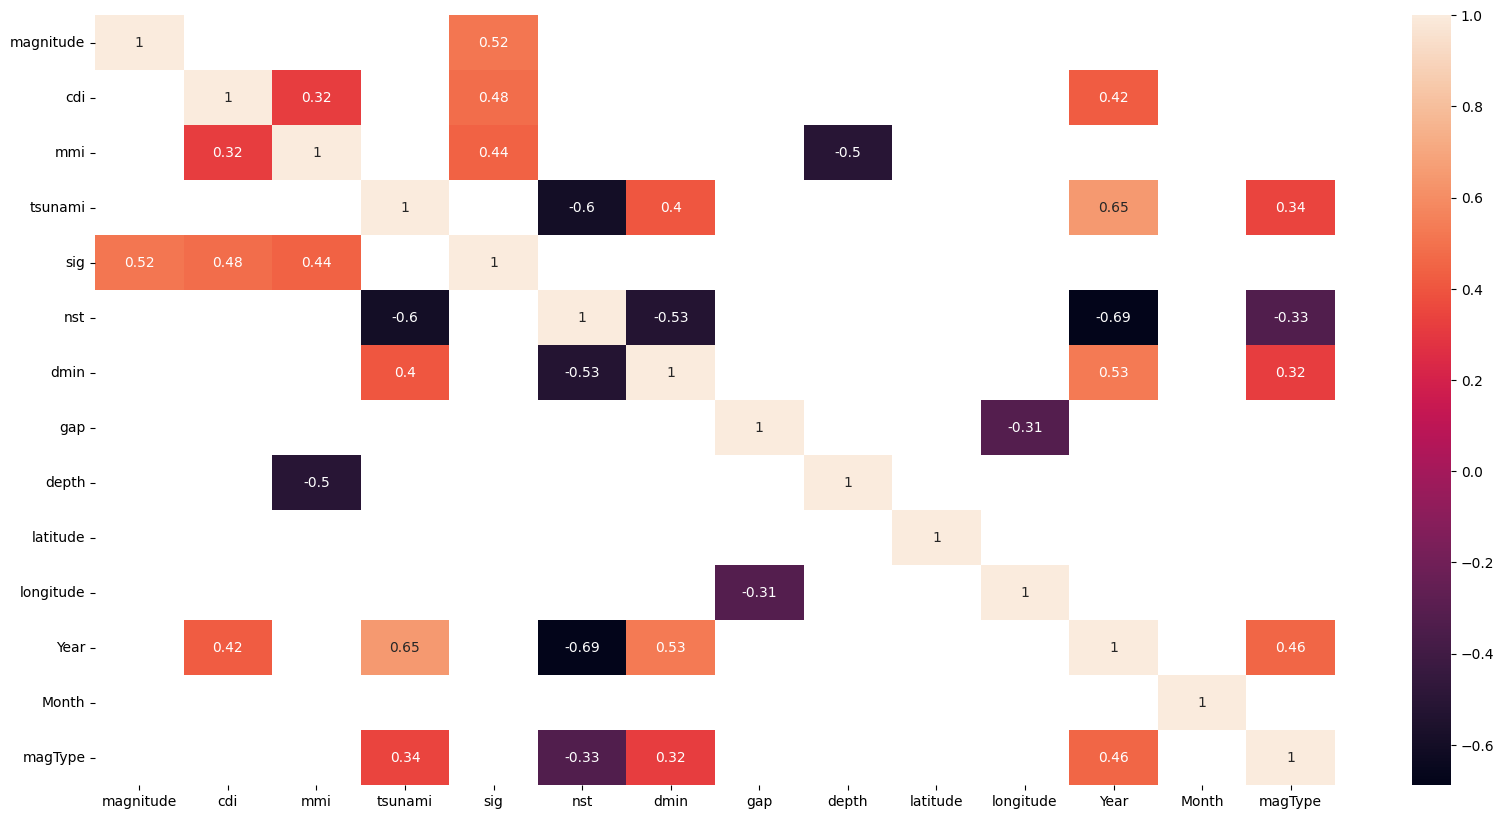

In [80]:
d=d[(d>0.3) | (d<-0.3)]
plt.figure(figsize=(20,10))
sns.heatmap(d,annot=True)

SCALING AND MODEL BUILDING

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler,SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
import xgboost as xgb

In [82]:
sc = StandardScaler()

x=df.drop('tsunami',axis=1)

In [87]:
x.head(3)

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,magType
0,7.0,8,7,768,117,0.509,17.0,14.0,-9.7963,159.596,2022,11,8
1,6.9,4,4,735,99,2.229,34.0,25.0,-4.9559,100.738,2022,11,8
2,7.0,3,3,755,147,3.125,18.0,579.0,-20.0508,-178.346,2022,11,8


In [88]:
y=df['tsunami']

In [90]:
y[:3]

0    1
1    0
2    1
Name: tsunami, dtype: int64

In [91]:
x_scaled=sc.fit_transform(x)

In [92]:
x_scaled

array([[ 0.13223459,  1.15730518,  0.70858793, ...,  1.59460058,
         1.26541326,  0.58932198],
       [-0.0923689 , -0.10535635, -1.34369267, ...,  1.59460058,
         1.26541326,  0.58932198],
       [ 0.13223459, -0.42102173, -2.0277862 , ...,  1.59460058,
         1.26541326,  0.58932198],
       ...,
       [ 0.35683808, -1.36801788,  0.70858793, ..., -1.85054226,
        -1.58714705, -1.34702167],
       [-0.31697239, -1.36801788, -0.65959913, ..., -1.85054226,
        -1.58714705, -0.37884984],
       [ 1.25525204, -1.36801788,  0.70858793, ..., -1.85054226,
        -1.58714705, -0.37884984]])

In [93]:
x=pd.DataFrame(x_scaled,columns=x.columns)

In [95]:
x.head(3)

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,magType
0,0.132235,1.157305,0.708588,-0.316853,-0.452952,-0.368342,-0.332058,-0.451079,-0.488691,0.908026,1.594601,1.265413,0.589322
1,-0.092369,-0.105356,-1.343693,-0.419255,-0.524943,0.407346,0.370143,-0.370898,-0.311296,0.408482,1.594601,1.265413,0.589322
2,0.132235,-0.421022,-2.027786,-0.357193,-0.332965,0.811425,-0.290752,3.667319,-0.864507,-1.960180,1.594601,1.265413,0.589322


In [96]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

<Axes: xlabel='tsunami', ylabel='count'>

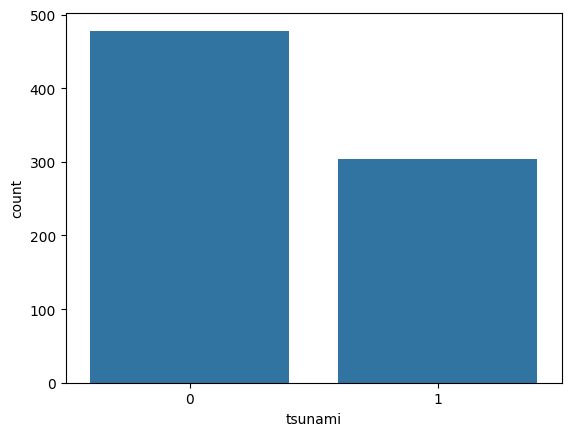

In [97]:
sns.countplot(x=y,data=df)

DEALING WITH IMBALANCE DATA

In [98]:
x_train.head(2)

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,magType
654,-0.541576,0.525974,-0.659599,-0.431667,1.858788,-0.597892,-0.170965,-0.305295,-0.108154,0.389140,-1.194325,-0.446123,-1.347022
605,-0.766179,-1.368018,0.708588,-0.620956,0.082988,-0.597892,-0.373364,-0.480236,-0.392403,0.875613,-0.866216,-0.731379,-6.187881


In [99]:
y_train.head(2)

654    0
605    0
Name: tsunami, dtype: int64

In [100]:
sm=SMOTE()
x_train1,y_train1=sm.fit_resample(x_train,y_train)

Synthetic Minority Over-sampling Technique (SMOTE) is a technique used to address the issue of imbalanced data in machine learning. It works by creating synthetic examples of the minority class, thereby increasing its representation in the dataset.


In [101]:
x_train1.head(2)

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,magType
0,-0.541576,0.525974,-0.659599,-0.431667,1.858788,-0.597892,-0.170965,-0.305295,-0.108154,0.389140,-1.194325,-0.446123,-1.347022
1,-0.766179,-1.368018,0.708588,-0.620956,0.082988,-0.597892,-0.373364,-0.480236,-0.392403,0.875613,-0.866216,-0.731379,-6.187881


In [102]:
models = {
    "Logistic regression":LogisticRegression(),
    "Tree ":DecisionTreeClassifier(),
    "Ensambled":RandomForestClassifier(),
    "xg":xgb.XGBClassifier()
}

RESULT

In [103]:
for name,model in models.items():
    model.fit(x_train,y_train)
    p = model.predict(x_test)
    print("Model: " , name)
    print("------------------------------")
    print(classification_report(y_test,p))
    print(".........................................................|")

Model:  Logistic regression
------------------------------
              precision    recall  f1-score   support

           0       0.85      0.85      0.85        93
           1       0.78      0.78      0.78        64

    accuracy                           0.82       157
   macro avg       0.82      0.82      0.82       157
weighted avg       0.82      0.82      0.82       157

.........................................................|
Model:  Tree 
------------------------------
              precision    recall  f1-score   support

           0       0.88      0.92      0.90        93
           1       0.88      0.81      0.85        64

    accuracy                           0.88       157
   macro avg       0.88      0.87      0.87       157
weighted avg       0.88      0.88      0.88       157

.........................................................|
Model:  Ensambled
------------------------------
              precision    recall  f1-score   support

           0       0

GRID SEARCH :HYPERPARAMETER

In [104]:
# Model:  xg
model=xgb.XGBClassifier()
params = {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [3, 5, 7]
        }
grid= GridSearchCV(model, params, cv=5)
grid.fit(x_train,y_train)
print(grid.best_params_)
print(grid.best_score_)

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}
0.9231999999999999


              precision    recall  f1-score   support

           0       1.00      0.89      0.94        93
           1       0.86      1.00      0.93        64

    accuracy                           0.94       157
   macro avg       0.93      0.95      0.94       157
weighted avg       0.94      0.94      0.94       157

Axes(0.125,0.11;0.62x0.77)


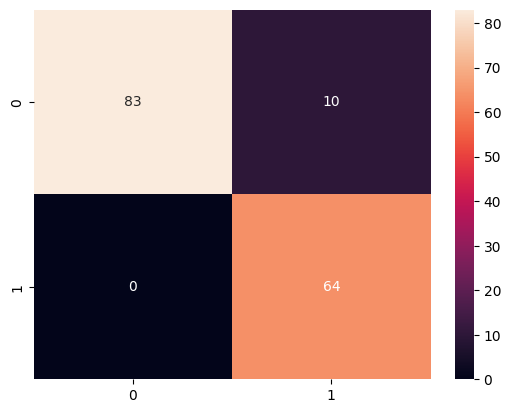

In [105]:
p = grid.predict(x_test)
print(classification_report(y_test,p))
print(sns.heatmap(confusion_matrix(y_test,p),annot=True))

In [106]:
# Model: RandomForest
model=RandomForestClassifier()
params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid= GridSearchCV(model, params, cv=5)
grid.fit(x_train,y_train)
print(grid.best_params_)
print(grid.best_score_)

{'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 100}
0.9008


              precision    recall  f1-score   support

           0       0.94      0.86      0.90        93
           1       0.82      0.92      0.87        64

    accuracy                           0.89       157
   macro avg       0.88      0.89      0.88       157
weighted avg       0.89      0.89      0.89       157

Axes(0.125,0.11;0.62x0.77)


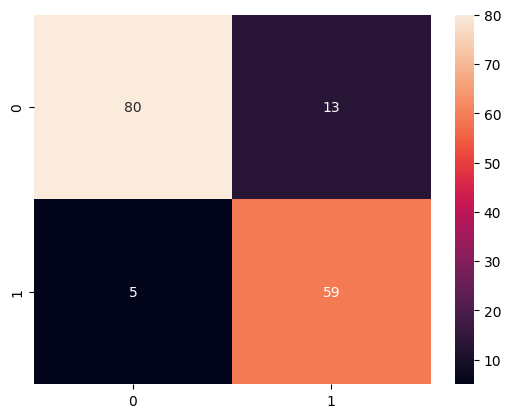

In [107]:
p = grid.predict(x_test)
print(classification_report(y_test,p))
print(sns.heatmap(confusion_matrix(y_test,p),annot=True))